In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Try to display a ball with python

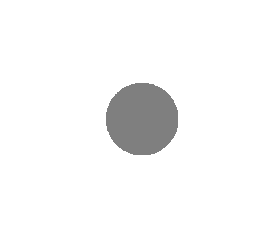

In [6]:
img = mpimg.imread('testImage.png')
originColor=img[0][0]
for i in range(0,599):
    for j in range(0,599):
        if np.square(i-300)+np.square(j-300)<np.square(100):
            img[i][j]=[0.5,0.5,0.5,1]

        img[i][j][4]=1
plt.axis('off')
imgplot = plt.imshow(img)

In [13]:
i=0.10
j=0.1
((i+j+np.sqrt(1-(np.square(i)+np.square(j))))*0.51+1)*5+0.5

8.534371208835974